In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics
from math import sqrt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.read_csv('result.csv')
# df = df.fillna(0)


rows_drop = []
for index, row in df.iterrows():
    if row[2:].isnull().sum()/len(row[2:]) > 0.5:
        rows_drop.append(index)
df = df.drop(rows_drop, axis=0)

features = list(df.columns.values)
features.remove('region_name')
features.remove('date')
for feature in features:
    df[feature] = df[feature].fillna(df[feature].mean())

region = df.region_name.unique()
def split_region(i):
    # val_state = np.array([region[i], region[i+1], region[i+2]])
    val_state = region[i]
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

def cross_val(neigh,typ):
    score_list_cv = []
    
    if typ == "region":
        for i in range(0,5):
            train, val = split_region(i)
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
    
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
        return np.average(score_list_cv)
    
    elif typ == "time":
            # if i == 0:
            train = df.loc[df['date'] < '2020-08-10']
            val = df.loc[df['date'] >= '2020-08-10']
            # else:
                # train = df.loc[df['date'] >= '2020-08-10']
                # val = df.loc[df['date'] < '2020-08-10']
            
            x_train = train.iloc[:,2:-1]
            y_train = train.iloc[:, -1]
            x_val = val.iloc[:,2:-1]
            y_val = val.iloc[:,-1] 
        
            neigh.fit(x_train, y_train)
            y_pred = neigh.predict(x_val)
            score_list_cv.append(sqrt(metrics.mean_squared_error(y_val,y_pred)))
            return np.average(score_list_cv)     
    return 0


In [2]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k),"region"))


In [3]:
print(min(score_list))
print(score_list)

29.9988447100804
[31.99916866204196, 30.95417498761153, 30.27555956839574, 30.300236666901338, 30.941485200493673, 30.58895598327989, 30.372315298942443, 30.587235849715768, 30.454493091487585, 30.937373048824963, 30.83298101498791, 30.633211690229825, 30.566243761014597, 30.672706731492234, 30.80954924562629, 30.523913258785615, 30.411225715666415, 30.521160701898246, 30.732190951184123, 30.64499381865865, 30.802307284774894, 30.568426513808834, 30.496669069077797, 30.565316321760452, 30.540618168434712, 30.508785254270133, 30.584639579458422, 30.56442383901004, 30.575470031128116, 30.521214233251687, 30.514573826477847, 30.50288719543595, 30.563996978790772, 30.51392751258776, 30.52531366208266, 30.559267262313615, 30.521425536749206, 30.53224646092883, 30.458553222005623, 30.426266569483026, 30.404885116573592, 30.367453029825764, 30.327520403524442, 30.34020626152906, 30.270255944019016, 30.30828204019257, 30.33676564941115, 30.273409202226794, 30.257612946486415, 30.17348556625468

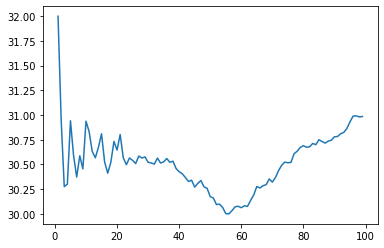

In [4]:
plt.plot(range(1,100),score_list)

31.20860041353121
[31.20860041353121, 33.42570097485701, 39.549686811126996, 35.479799572439035, 35.71945698457645, 37.67990685393427, 35.370136847515774, 37.2636686340975, 37.068248220556875, 38.18700871476197, 38.23572499201714, 38.16237503379805, 38.16237503379805, 38.16237503379805, 38.16237503379805, 38.16237503379805, 38.16237503379805]


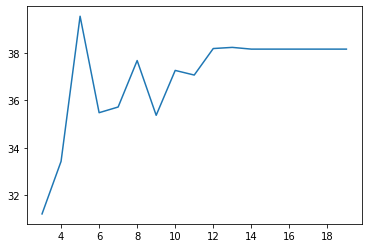

In [5]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"region"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

36.58510697105221
[38.82895182721264, 37.96469028364822, 36.69411851146357, 36.58510697105221, 36.74699534202309, 36.7706621809048, 37.2164563849158, 37.66287545448435, 37.9921342303178, 38.14276908318709, 38.534037849708334, 38.856194093663426, 38.6843227219709, 38.63705286045374, 38.79933180027909, 38.905784593936566, 38.89978770219271, 38.845136598365556, 39.107250221055715, 39.24783831626909, 38.83880967293256, 39.07192544688221, 38.92238522391181, 39.30018014504349, 39.53306042626433, 39.6824158285026, 39.828851602597204, 39.9385579208992, 39.90448893567738, 39.88741476307385, 40.16923232997965, 40.30469078107824, 40.50941805907044, 40.55787374117194, 40.63463595820421, 40.747291008569356, 40.93583167531942, 40.960867272773484, 40.85894619969583, 40.92222822648876, 41.03729945983503, 41.056403681493435, 41.089222239460014, 41.125690138607055, 41.193441210530494, 41.31515900655122, 41.42954897070569, 41.63172308606938, 41.77244832735351, 41.83860398404007, 41.99186951780559, 41.995

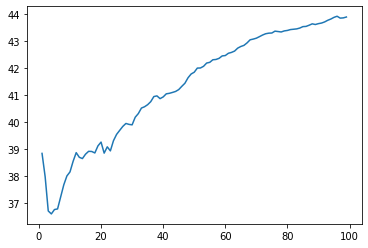

In [6]:
score_list = []
for k in range(1,100):
    score_list.append(cross_val(KNN(k),"time"))

print(min(score_list))
print(score_list)
plt.plot(range(1,100),score_list)

42.15129962628893
[42.25627780005996, 42.885876843875295, 44.77055635473564, 43.566733696585636, 42.82146392445902, 43.22250571172384, 42.15129962628893, 43.6439786797675, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134, 42.376536353663134]


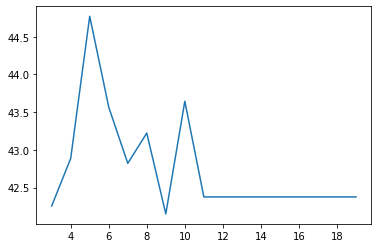

In [7]:
score_list = []
for k in range(3,20):
    #score_list.append(cross_val(DTR(max_depth=k)))
    score_list.append(cross_val(DTR(max_depth=k,random_state=10),"time"))
    
print(min(score_list))
print(score_list)
plt.plot(range(3,20),score_list)

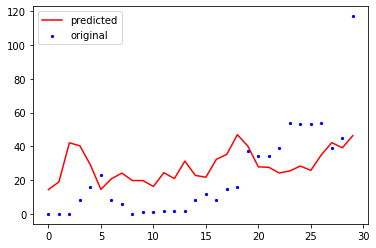

In [8]:
knn = KNN(20)

train, val = split_region(1)
knn.fit(train.iloc[:,3:-1], train.iloc[:,-1])
pred = knn.predict(val.iloc[:,3:-1])
plt.scatter(range(len(val.iloc[:,-1])), val.iloc[:,-1], s=5, color="blue", label="original")
plt.plot(range(len(val.iloc[:,-1])), pred, color="red", label="predicted")
plt.legend()
plt.show()